In [5]:
import xarray as xr
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
import numpy as np

from RU29_helpers import grid_glider
import pandas as pd

In [6]:
dataid = 'ru29-20200908T1623-profile-sci-rt'

ru29ds = grid_glider(dataid)

/Users/tnmiles/opt/anaconda3/envs/masters/lib/python3.9/site-packages/scipy/stats/_binned_statistic.py:648: RuntimeWarning: Mean of empty slice
  result[vv, i] = stat_func(bin_map[i])
/Users/tnmiles/opt/anaconda3/envs/masters/lib/python3.9/site-packages/scipy/stats/_binned_statistic.py:648: RuntimeWarning: Mean of empty slice
  result[vv, i] = stat_func(bin_map[i])


In [7]:
ru29ds

<xarray.Dataset>
Dimensions:                (date: 1090, depth: 199)
Coordinates:
  * date                   (date) datetime64[ns] 2020-09-08T16:45:31.84337305...
  * depth                  (depth) float64 2.5 7.5 12.5 ... 982.5 987.5 992.5
    lat                    (date) float64 18.18 18.18 18.18 ... 18.16 18.16
    lon                    (date) float64 -64.8 -64.81 -64.8 ... -64.79 -64.79
Data variables:
    u                      (date) float64 nan nan nan ... 0.002537 nan -0.03963
    v                      (date) float64 nan nan nan ... -0.01012 nan 0.01019
    potential_temperature  (depth, date) float64 nan nan nan nan ... nan nan nan
    salinity               (depth, date) float64 nan nan nan nan ... nan nan nan
    cdom                   (depth, date) float64 nan nan nan nan ... nan nan nan
    chlorophyll_a          (depth, date) float64 nan nan nan nan ... nan nan nan
    beta_700nm             (depth, date) float64 nan nan nan nan ... nan nan nan

(1000.0, 0.0)

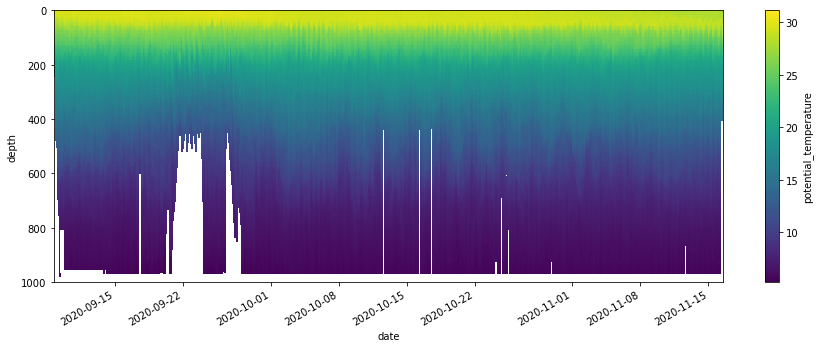

In [8]:
plt.figure(figsize=(15,5))
ru29ds.potential_temperature.plot()
plt.ylim([1000, 0])

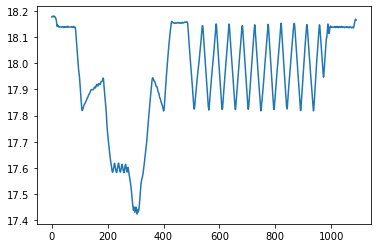

In [9]:
plt.plot(ru29ds.lat)

In [10]:
prom = .05

Nends, propN = find_peaks(ru29ds.lat,  
                          threshold=None, distance=None, prominence=prom)
Sends, prop = find_peaks( -1*ru29ds.lat,  
                         threshold=None, distance=None, prominence=prom)

sections = np.sort(np.append(Nends, Sends ))
Nends

array([184, 361, 429, 539, 588, 634, 682, 726, 774, 820, 867, 913, 958])

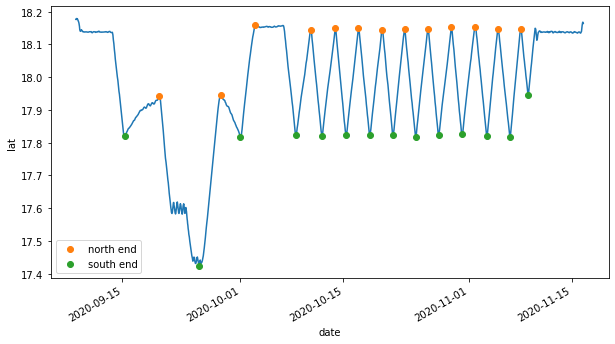

In [11]:

plt.figure( figsize=(10,5))
ru29ds.lat.plot()

plt.plot(ru29ds.date[Nends] , ru29ds.lat[Nends], 'o', label='north end' )
plt.plot(ru29ds.date[Sends] , ru29ds.lat[Sends], 'o' , label='south end')
plt.legend()
# plt.xlim(['2020-09-13', '2020-09-16'])

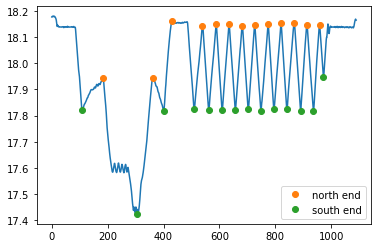

In [12]:
plt.plot(ru29ds.lat)



plt.plot(Nends, ru29ds.lat[Nends], 'o', label='north end' )
plt.plot(Sends, ru29ds.lat[Sends], 'o' , label='south end')
plt.legend()
# plt.xlim([475, 500])
# plt.ylim([18.2, 18.0])

In [13]:
sections[0]

109

In [14]:
# create a list of section endsL



start = [84, sections[4], 485, ]
end = [sections[0], sections[5], sections[6]  ]

start = np.append(start, sections[6:-1])
end = np.append(end, sections[7:])

print(len(start))
print(len(end))

23
23


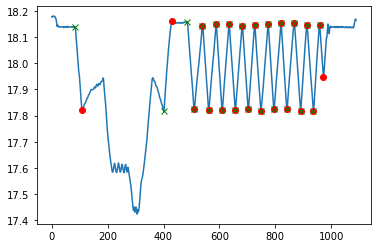

In [15]:
plt.plot(ru29ds.lat)

# plt.plot(good_section_id, ru29ds.lat[good_section_id], 'o')
plt.plot(end, ru29ds.lat[end], 'ro')
plt.plot(start, ru29ds.lat[start], 'gx')



In [16]:
ru29ds.date[start].values
ru29ds.date[end].values
ru29ds.date[start].values.astype('datetime64[s]')

array(['2020-09-13T15:21:18', '2020-10-01T00:26:24',
       '2020-10-06T20:48:49', '2020-10-08T13:48:27',
       '2020-10-10T13:04:46', '2020-10-12T02:23:15',
       '2020-10-13T21:10:42', '2020-10-15T09:07:30',
       '2020-10-17T00:31:58', '2020-10-18T13:53:20',
       '2020-10-20T06:44:54', '2020-10-21T17:10:48',
       '2020-10-23T07:00:58', '2020-10-24T18:42:06',
       '2020-10-26T10:57:09', '2020-10-27T21:53:33',
       '2020-10-29T15:06:27', '2020-10-31T03:11:10',
       '2020-11-01T20:22:59', '2020-11-03T10:19:54',
       '2020-11-05T00:00:26', '2020-11-06T13:40:38',
       '2020-11-08T01:52:25'], dtype='datetime64[s]')

In [17]:
# create a list of start and end times

Section_time = pd.DataFrame({'section_number':range(23),
              'starttime': ru29ds.date[start].values.astype('datetime64[s]'), 
              'endtime':ru29ds.date[end].values.astype('datetime64[s]') }
                           ).set_index('section_number')

Section_time.to_csv('anagada_section_times.csv')
Section_time

,starttime,endtime
section_number,,
0,2020-09-13 15:21:18,2020-09-15 06:58:35
1,2020-10-01 00:26:24,2020-10-03 00:46:16
2,2020-10-06 20:48:49,2020-10-08 13:48:27
3,2020-10-08 13:48:27,2020-10-10 13:04:46
4,2020-10-10 13:04:46,2020-10-12 02:23:15
5,2020-10-12 02:23:15,2020-10-13 21:10:42
6,2020-10-13 21:10:42,2020-10-15 09:07:30
7,2020-10-15 09:07:30,2020-10-17 00:31:58
8,2020-10-17 00:31:58,2020-10-18 13:53:20


0
1
2


<ipython-input-18-5cc9aefe3c63>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( sec.lat, sec.depth, sec.potential_temperature, vmin=5, vmax=30)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<ipython-input-18-5cc9aefe3c63>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


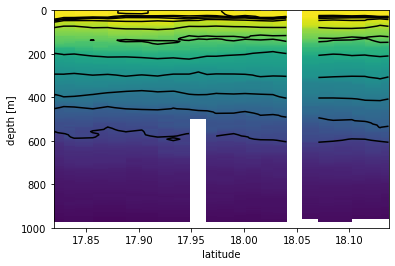

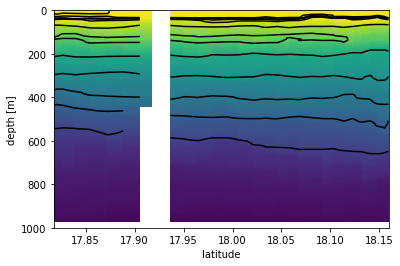

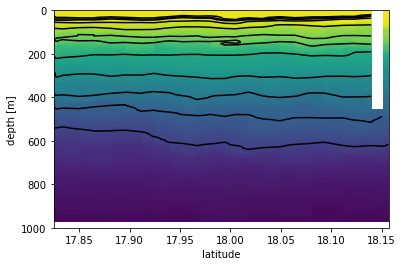

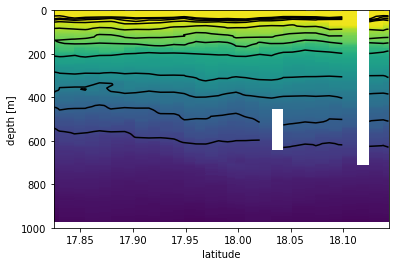

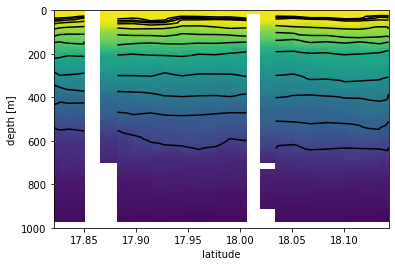

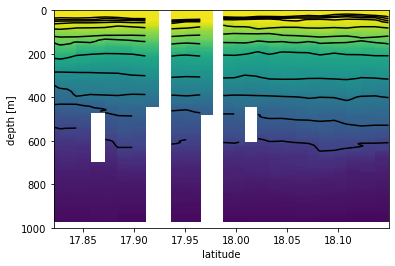

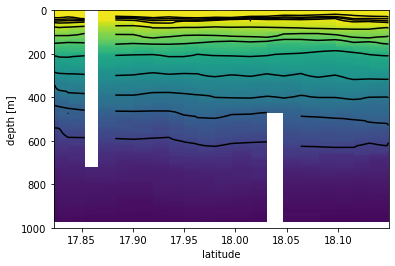

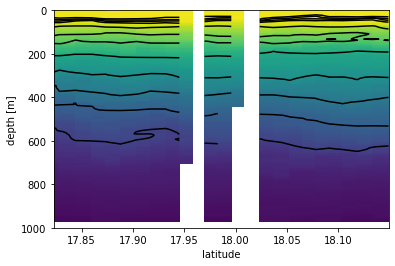

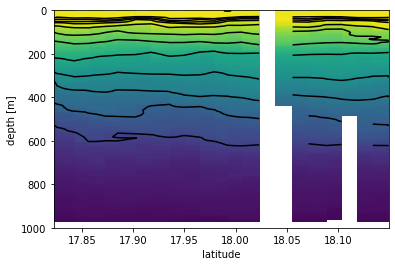

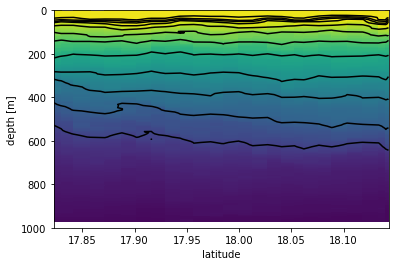

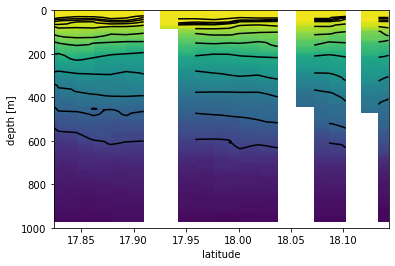

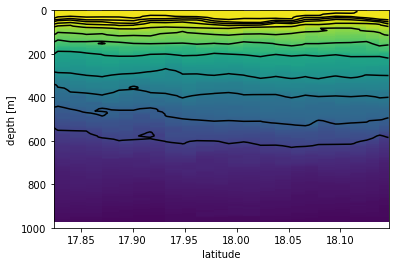

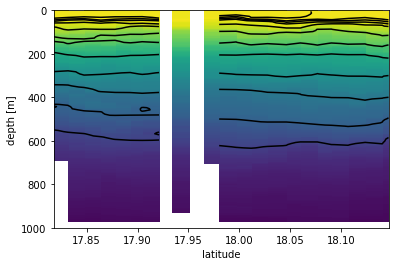

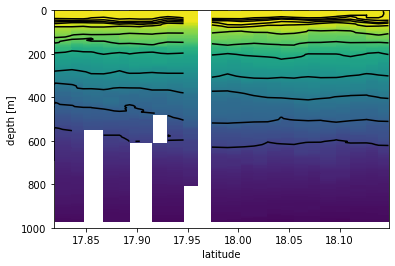

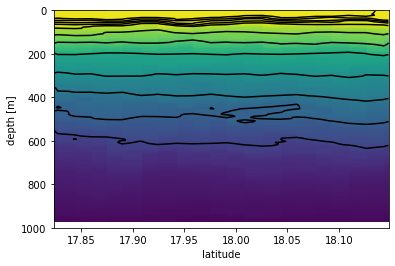

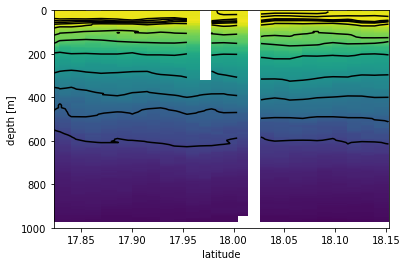

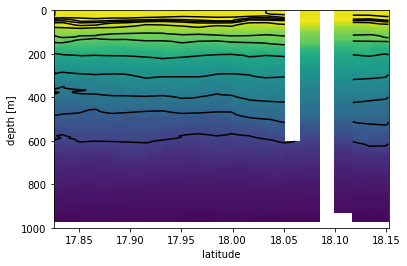

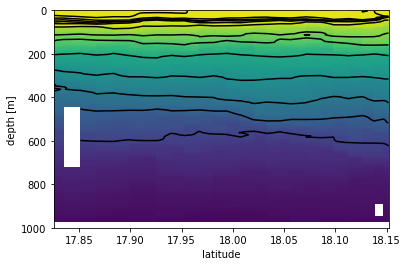

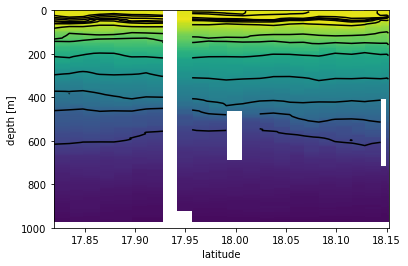

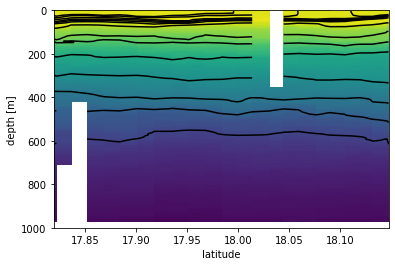

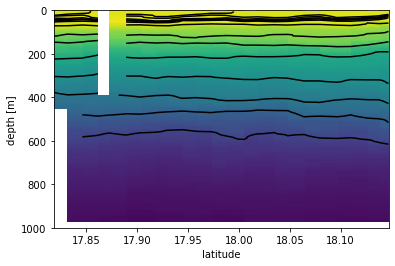

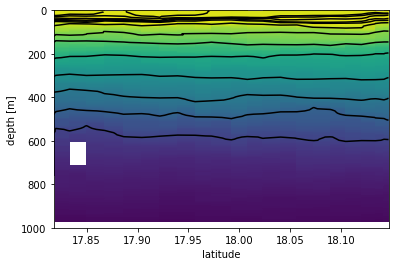

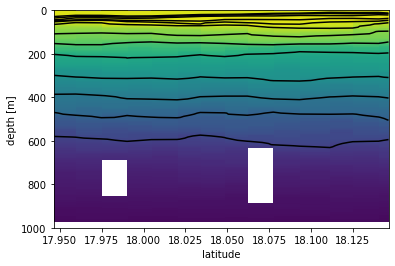

In [18]:
for idx in range(len(start)):
    print(idx)

    sec = ru29ds.sel( date = slice(ru29ds.date[ start[idx] ], 
                                    ru29ds.date[ end[idx] ]))
        
    
    plt.figure()
    plt.pcolormesh( sec.lat, sec.depth, sec.potential_temperature, vmin=5, vmax=30)
    plt.contour( sec.lat, sec.depth, sec.salinity, colors='k')

    plt.ylim([1000, 0])
    plt.ylabel('depth [m]')
    plt.xlabel('latitude')